## Import Library

---



In [ ]:
import seaborn as sns
import io
import pandas as pd              
from scipy import stats          
import numpy as np               
import matplotlib.pyplot as plt 
plt.style.use('dark_background')

## Load Dataset

---



In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Galaxy_4.csv']))
df.head()

Saving Galaxy_4.csv to Galaxy_4 (1).csv


,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY


**DATA WRANGLING**

---



In [ ]:
df

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   i       100000 non-null  float64
 1   z       100000 non-null  float64
 2   class   100000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
df['class'] = df['class'].astype('category')
df['i'] = df.i.astype('float64')
df['z'] = df.z.astype('float64')
df.dtypes

i         float64
z         float64
class    category
dtype: object

In [ ]:
# Variabel independen with collumn i and z
x = df.iloc[:, 0:2]
x.head(6)

,i,z
0,19.16573,18.79371
1,21.16812,21.61427
2,19.34857,18.94827
3,20.50454,19.25010
4,15.97711,15.54461
5,20.25615,19.54544


In [ ]:
y = df.iloc[:, 2]
y.head(6)

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
5       QSO
Name: class, dtype: category
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

### **DATA VALIDATION**


---



In [ ]:
y.unique()

['GALAXY', 'QSO', 'STAR']
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [ ]:
y.describe()

count     100000
unique         3
top       GALAXY
freq       59445
Name: class, dtype: object

In [ ]:
x.describe()

,i,z
count,100000.000000,100000.000000
mean,19.084854,18.668810
std,1.757895,31.728152
min,9.469903,-9999.000000
25%,17.732285,17.460677
50%,19.405145,19.004595
75%,20.396495,19.921120
max,32.141470,29.383740


In [ ]:
# Describe
x.describe().loc[['min', 'max']]

,i,z
min,9.469903,-9999.00000
max,32.141470,29.38374


In [ ]:
# Read CSV File
df = pd.read_csv('Galaxy_4.csv')

# Filter Data with i
df_filtered = df.loc[df['i'] < 15.0000000]

# Save Filter Result into CSV File
df_filtered.to_csv('databaru.csv', index=False)

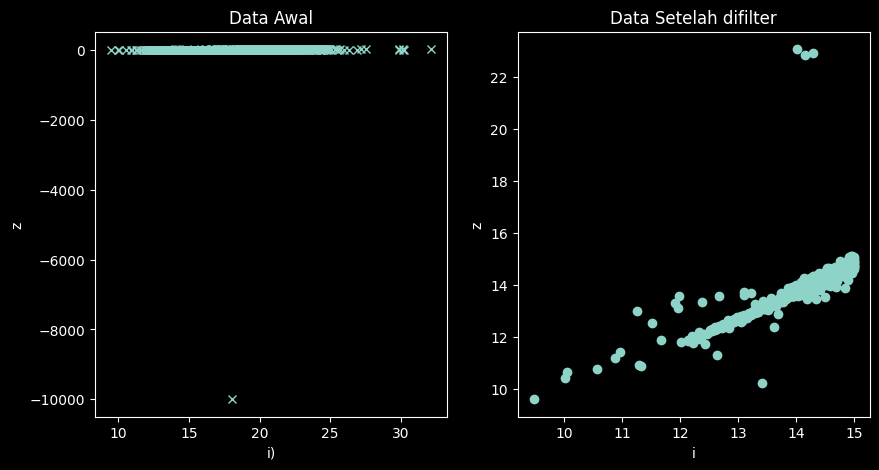

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(df['i'], df['z'], 'x')
# Set Lable and Title in Subplot 1
ax1.set_xlabel('i)')
ax1.set_ylabel('z')
ax1.set_title('Data Awal')

# Plot Data Filter Result into Subplot 2
ax2.plot(df_filtered['i'], df_filtered['z'], 'o')

# Set Lable and Title into Subplot 2
ax2.set_xlabel('i')
ax2.set_ylabel('z')
ax2.set_title('Data Setelah difilter')

# Show plot
plt.show()

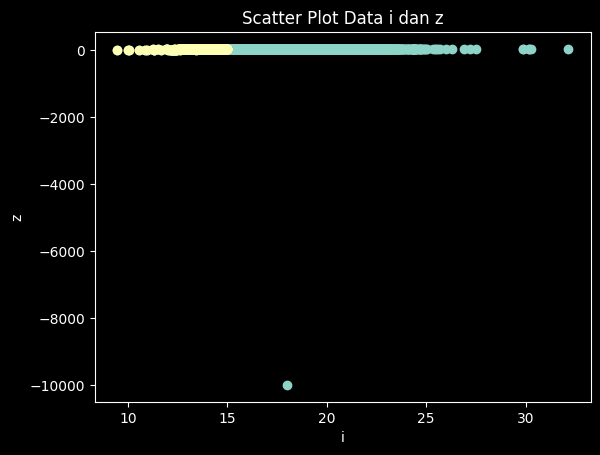

In [ ]:
# Plot Data Before
plt.scatter(df['i'], df['z'], label='Data Awal')

# Plot Data Filter Result
plt.scatter(df_filtered['i'], df_filtered['z'], label='Data Filter')

# Set Label Axis and Plot Title
plt.xlabel('i')
plt.ylabel('z')
plt.title('Scatter Plot Data i dan z')


# Show plot
plt.show()


Link Dataset diambil : https://aidsinfo.unaids.org/

In [ ]:
# User Function From sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
# Call KNN with named KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance' ,metric="euclidean")
knn.fit(x_train.values, y_train.values)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [ ]:
knn.predict([[20.55642,18.23209	]])

array(['QSO'], dtype=object)

In [ ]:

df_Testing = pd.DataFrame(columns = ['i','z','Prediction','Real'])


df_Testing.loc[:, 'i'] = x_test['i'].values
df_Testing.loc[:, 'z'] = x_test['z'].values
df_Testing.loc[:, 'Prediction'] = knn.predict(x_test.to_numpy())
df_Testing.loc[:, 'Real'] = y_test.values


df_Testing

<ipython-input-194-0a39716788f0>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_Testing.loc[:, 'z'] = x_test['z'].values
<ipython-input-194-0a39716788f0>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_Testing.loc[:, 'Real'] = y_test.values


,i,z,Prediction,Real
0,20.89438,19.96155,GALAXY,GALAXY
1,20.77301,20.56856,QSO,QSO
2,21.26267,21.73729,QSO,GALAXY
3,18.60666,18.23209,GALAXY,GALAXY
4,17.51454,17.16425,GALAXY,GALAXY
...,...,...,...,...
39995,14.18393,13.46494,STAR,STAR
39996,17.14968,16.96573,STAR,STAR
39997,17.07455,16.70235,GALAXY,GALAXY
39998,19.72733,19.23771,GALAXY,GALAXY


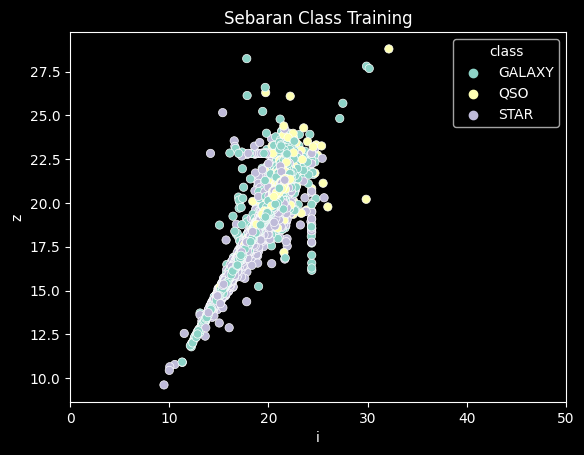

In [ ]:
df_ytrain = pd.DataFrame(y_train)

# Collab x_train and y_train
df_training = pd.concat([x_train, df_ytrain], axis=1)
df_training.reset_index(inplace=True)
df_training.drop(columns=["index"])

import seaborn as sns
sns.scatterplot(data=df_training, x='i', y='z', hue='class')
plt.title('Sebaran Class Training')
plt.xlim(0, 50)
plt.show()

## Model - Regresi Linear dengan Stochastic Gradient Descent

---



In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['kcb.csv']))
df.head()

Saving kcb.csv to kcb (2).csv


,Country,Most recent data as of 2021,Most recent data as of 2021_Footnote
0,Argentina,6.9,2021
1,Cambodia,13.3,2019
2,Dominican Republic,44.9,2018
3,Ethiopia,24.2,2021
4,Honduras,33.0,2019


In [ ]:
df

,Country,Most recent data as of 2021,Most recent data as of 2021_Footnote
0,Argentina,6.9,2021
1,Cambodia,13.3,2019
2,Dominican Republic,44.9,2018
3,Ethiopia,24.2,2021
4,Honduras,33.0,2019
5,Indonesia,4.6,2019
6,Iran (Islamic Republic of),58.7,2021
7,Jamaica,32.9,2019
8,Kazakhstan,36.5,2021
9,Kyrgyzstan,10.2,2020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               18 non-null     object 
 1   Most recent data as of 2021           18 non-null     float64
 2   Most recent data as of 2021_Footnote  18 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


In [ ]:
df['Country'] = df.Country.astype('category')
df['Most recent data as of 2021'] = df['Most recent data as of 2021'].astype('float64')
df['Most recent data as of 2021_Footnote'] = df['Most recent data as of 2021_Footnote'].astype('float64')
df.dtypes

Country                                 category
Most recent data as of 2021              float64
Most recent data as of 2021_Footnote     float64
dtype: object

In [ ]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Read CSV File
data = pd.read_csv('kcb.csv')

# Separate Independen and Dependen Variable
X = data.iloc[:, 1:].values
y = data.iloc[:, -1].values

# Divide Data Into Training And Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisasi data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# model Regression Linier With SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

# Training Model in Data Train
sgd_reg.fit(X_train, y_train)

# Prediction Value y into Data Test
y_pred = sgd_reg.predict(X_test)

# Show Slope and Intercept 
print("Slope: ", sgd_reg.coef_)
print("Intercept: ", sgd_reg.intercept_)


Slope:  [5.30683387e-04 9.24524276e-01]
Intercept:  [2019.99077199]


In [ ]:
y_pred = sgd_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
databaru = [[9, 2021]]
prediction = sgd_reg.predict(databaru)

In [ ]:

print('Prediksi dari atas:', prediction)

Prediksi dari atas: [3888.45911038]
